# Introduction

In part 1 of this assessment, you will complete several requested SQL queries in order to extract data, analyze, and provide insights from a single provided SQL database. You will also visualize the key results of 3 of these queries. There are also several 'Reflection' questions that ask you to write out a text based answer in the provided markdown cell. Following the guided question and answer section, in part 2 you will explore a second dataset on your own using SQL in order to conduct a preliminary analysis. You will be asked to produce a very short slide presentation highlighting the work you did for this second section.

## Objectives
You will be able to:
- Interpret "word problems" and translate them into SQL queries
- Decide and perform whichever type of JOIN is best for retrieving desired data
- Use GROUP BY statements to apply aggregate functions like COUNT, MAX, MIN, and SUM
- Use the HAVING clause to compare different aggregates
- Write subqueries to decompose complex queries
- Visualize data using matplotlib, seaborn, or pandas
- Choose the correct chart type based on the given data


## Part 1: Guided SQL Queries

### Your Task: Querying a Customer Database

![toy car picture](images/toycars.jpg)


### Business Understanding
Your employer sells wholesale miniature models of products such as classic cars, motorcycles, and planes. They want you to pull several reports on different segments of their past customers, in order to better understand past sales as well as determine which customers will receive promotional material. They are also interested in investigating which products have performed the best, as well as having several smaller asks.

In addition to providing the requested data from the SQL database you have also been asked to create some basic visuals to display some of the more insightful information. It is up to your discretion to choose the correct plot/chart type for the data in question. **Questions that want you to visualize the results will be explicitly marked**.

### Data Understanding
You may remember this database from a previous lab. As a refresher, here's the ERD diagram for this database:

![ERD picture](images/ERD.png)

The queries you are asked to write will become more complex over the course of the lab.



### Getting Started
For this assessment you are expected to make use of both sqlite3 and the Pandas libraries in order to write, execute, and return SQL queries as a Pandas DataFrame. Assign each returned answer as its own explicit variable.

For the visualization piece you are expected to utilize either Pandas, Seaborn, or Matplotlib to create your visuals. Make sure you are providing verbose labels and titles according to the data you are being asked to visualize. Do not worry too much about choosing a 'style' or 'context' instead focus on conveying the requested information correctly.

### Step 1: Connect to Data

In the cell below
- Import the necessary libraries
- Establish a connection to the database data.sqlite

In [1]:
# Replace None with your code
# Imports
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create connection to database
conn = sqlite3.connect('data.sqlite')

### Step 2: Limited Edition California Product
The California sales rep team is interested in running promotional material for a new limited edition model they are releasing based on the famous San Francisco Cable Cars. This product will only be available to customer stores based in California and given its high price value they want to first target promotional material to existing California customers with a high credit limit. Upon communicating with the accounting department, a credit limit of over 25,000 is considered to be high. 

Execute a SQl query that returns which customers the sales rep team wants to market to first.

In [3]:
# Replace None with your code
query2 = """
SELECT customerName, state, creditLimit
FROM customers
WHERE state = 'CA'
AND creditLimit > 2500
"""

california_customers = pd.read_sql(query2, conn)
california_customers

,customerName,state,creditLimit
0,Mini Gifts Distributors Ltd.,CA,210500.00
1,Mini Wheels Co.,CA,64600.00
2,Technics Stores Inc.,CA,84600.00
3,Toys4GrownUps.com,CA,90700.00
4,Boards & Toys Co.,CA,11000.00
5,Collectable Mini Designs Co.,CA,105000.00
6,Corporate Gift Ideas Co.,CA,105000.00
7,"Men 'R' US Retailers, Ltd.",CA,57700.00
8,The Sharp Gifts Warehouse,CA,77600.00
9,West Coast Collectables Co.,CA,55400.00


### Step 3: International Collectable Campaign

The international sales rep team has reached out to you to help them identify partners for a 'Collectable' marketing campaign that highlights the potential collectors value in purchasing these model kits. They want to try and promote a 'collect them all' mentality. The team had a great idea to partner with any of their international customers (non-US) who have "Collect" in their name as a tie in to the larger theme.

Execute a SQL that returns the customers in question.

In [4]:
# Replace None with your code
query3 = """
SELECT customerName, country
FROM customers
WHERE country != 'USA'
AND customerName LIKE '%Collect%'
"""

collect_customers = pd.read_sql(query3, conn)
collect_customers

,customerName,country
0,"Australian Collectors, Co.",Australia
1,"Clover Collections, Co.",Ireland
2,"UK Collectables, Ltd.",UK
3,"King Kong Collectables, Co.",Hong Kong
4,Heintze Collectables,Denmark
5,"Royal Canadian Collectables, Ltd.",Canada
6,BG&E Collectables,Switzerland
7,Reims Collectables,France
8,Precious Collectables,Switzerland
9,Salzburg Collectables,Austria


## Reflection Question:

Describe the WHERE clause you used in the above query to a non-technical manager who wants to be ensured that you are properly filtering and only selecting the requested data. How is the operator and conditional expression you are using acting to accomplish this? 

I used a WHERE clause that applies two filters. The first filter excludes customers located in the USA using the != operator. The second filter uses the LIKE operator with wildcard symbols (%) to search for any customer name containing the word "Collect." The percentage signs allow the word to appear anywhere in the name. Both conditions are combined using AND, ensuring that only customers meeting both requirements are returned. 

### Step 4: USA Credit and Inventory Policy - Visual Required
The USA based product team is planning to adjust its credit policies and inventory allocation strategy based on the average credit limit of its customers. They would like to target this strategy at a state level with several goals in mind. 
1. Optimize inventory distribution:
    - States with higher average credit limits might be able to place larger orders, justifying priority in inventory allocation.
    - This could help ensure that states with more purchasing power always have products in stock.
2. Tailor credit policies:
    - Adjust credit limits for new customers based on the state average.
    - Identify states where they might be too conservative or too liberal with credit limits.
3. Target marketing and sales efforts:
    - Focus promotional campaigns on states with higher credit limits, potentially leading to larger orders.
    - Develop strategies to increase sales in states with lower average credit limits.

Execute a SQl query that returns the information required to address this ask.

In [5]:
# Replace None with your code
query4 = """
SELECT state, AVG(creditLimit) AS avg_credit_limit
FROM customers
WHERE country = 'USA'
GROUP BY state
ORDER BY avg_credit_limit DESC
"""

usa_credit = pd.read_sql(query4, conn)
usa_credit

,state,avg_credit_limit
0,NH,114200.000000
1,NY,89966.666667
2,PA,84766.666667
3,CA,83854.545455
4,NV,71800.000000
5,MA,70755.555556
6,CT,57350.000000
7,NJ,43000.000000


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

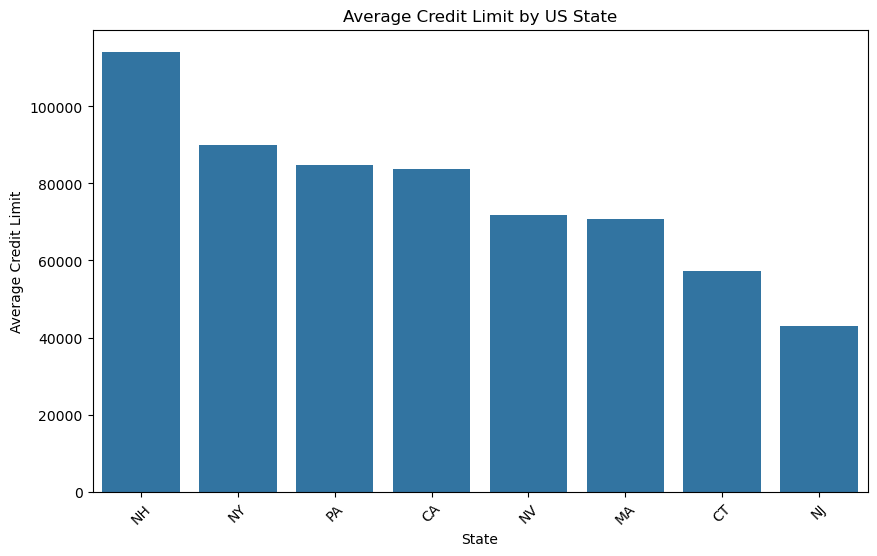

In [6]:
# Replace None with your visual code
# Produce a visual to represent the average credit limit by state
plt.figure(figsize=(10,6))
sns.barplot(data=usa_credit, x='state', y='avg_credit_limit')
plt.title("Average Credit Limit by US State")
plt.xlabel("State")
plt.ylabel("Average Credit Limit")
plt.xticks(rotation=45)
plt.show()

### Step 5: Top Customers - Visual Required
The company is approaching its 10 year anniversary and wants to acknowledge and thank its top customers with personalized communication. They have asked you to determine the top 10 customers based on the total amount of payments made, making sure to return the customer name for clarity. 

Execute a SQl query that returns the information required to address this ask.


In [7]:
# Replace None with your code
query5 = """
SELECT c.customerName, SUM(p.amount) AS total_paid
FROM customers c
JOIN payments p
ON c.customerNumber = p.customerNumber
GROUP BY c.customerName
ORDER BY total_paid DESC
LIMIT 10
"""

top_customers = pd.read_sql(query5, conn)
top_customers

,customerName,total_paid
0,Euro+ Shopping Channel,715738.98
1,Mini Gifts Distributors Ltd.,584188.24
2,"Australian Collectors, Co.",180585.07
3,Muscle Machine Inc,177913.95
4,"Dragon Souveniers, Ltd.",156251.03
5,"Down Under Souveniers, Inc",154622.08
6,"AV Stores, Co.",148410.09
7,"Anna's Decorations, Ltd",137034.22
8,Corporate Gift Ideas Co.,132340.78
9,"Saveley & Henriot, Co.",130305.35


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

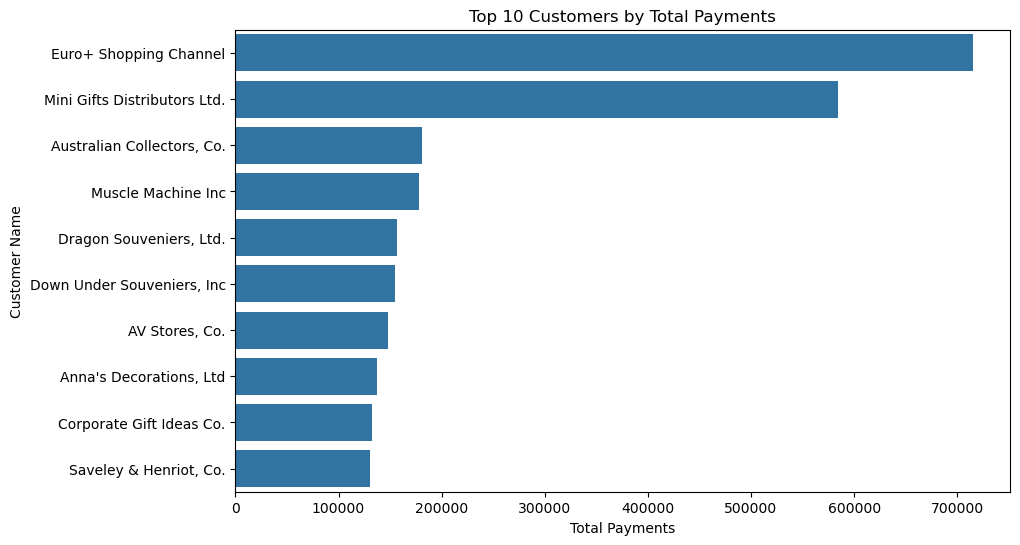

In [8]:
# Replace None with your visual code
# Produce a visual to represent the top ten customers in terms of total payments
plt.figure(figsize = (10,6))
sns.barplot(data=top_customers, y='customerName', x='total_paid')
plt.title("Top 10 Customers by Total Payments")
plt.xlabel("Total Payments")
plt.ylabel("Customer Name")
plt.show()

### Step 6: Top Customer + Product Quantities
The product team is running an analysis on popular and common products sold to each customer in order to try and determine what new products they should be looking at to include in their catalog. This data will also be used by individual sales reps to recommend similar products to each customer next time they place an order. 

They have asked you to query information, for each customer, about any product they have purchased 10 or more units of. In addition they would like the full set of data to be sorted in ascending order by the total amount purchased.

Execute a SQl query that returns the information required to address this ask.

Hint: For this one, you'll need to make use of HAVING, GROUP BY, and ORDER BY — make sure you get the order of them correct!

In [9]:
# Replace None with you code
query6 = """
SELECT c.customerName, 
       p.productName, 
       SUM(od.quantityOrdered) AS total_quantity
FROM customers c
JOIN orders o ON c.customerNumber = o.customerNumber
JOIN orderdetails od ON o.orderNumber = od.orderNumber
JOIN products p ON od.productCode = p.productCode
GROUP BY c.customerName, p.productName
HAVING total_quantity >= 10
ORDER BY total_quantity ASC
"""

customer_products = pd.read_sql(query6, conn)
customer_products

,customerName,productName,total_quantity
0,"Extreme Desk Decorations, Ltd",1961 Chevrolet Impala,10
1,Petit Auto,1913 Ford Model T Speedster,10
2,La Rochelle Gifts,1954 Greyhound Scenicruiser,11
3,Tekni Collectables Inc.,American Airlines: B767-300,11
4,The Sharp Gifts Warehouse,1969 Chevrolet Camaro Z28,13
...,...,...,...
2526,Euro+ Shopping Channel,2002 Chevy Corvette,174
2527,Euro+ Shopping Channel,1957 Chevy Pickup,183
2528,Euro+ Shopping Channel,1970 Dodge Coronet,197
2529,Euro+ Shopping Channel,1958 Chevy Corvette Limited Edition,245


### Step 7: Product Analysis - Visual Required

The product team is looking into the demand across its different product lines. They are conducting a comprehensive review of its product portfolio and inventory management strategies. You have been asked to query data pertaining to each different product line, that contains the total quantity ordered and the total number of products for each respective product line. By examining the number of products and total quantity ordered for each product line, the company aims to:
1. Optimize product mix:
    - Identify which product lines have the most diverse offerings (high number of products)
    - Determine which lines are most popular (high total quantity ordered)
    - Compare if lines with more products necessarily lead to more orders
2. Improve inventory management:
    - Adjust stock levels based on the popularity of each product line
    - Identify potential overstocking in lines with low order quantities
    - Ensure adequate variety in high-performing product lines
3. Adjust marketing strategy:
    - Focus promotional efforts on product lines with high potential (many products but lower order quantities)
    - Capitalize on the popularity of high-performing lines in marketing campaigns
4. Advise Product development:
    - Invest in expanding product ranges for lines with high order quantities
    - Consider phasing out or revamping product lines with low numbers of products and low order quantities

Hint: Think about how you can and might have to utilize SQL DISTINCT statement

Execute a SQl query that returns the information required to address this ask.

In [10]:
# Replace None with your code
query7 = """
SELECT pl.productLine, 
        COUNT(DISTINCT p.productCode) AS num_products,
        SUM(od.quantityOrdered) AS total_quantity
FROM productlines pl
JOIN products p ON pl.productLine = p.productLine
JOIN orderdetails od ON p.productCode = od.productCode
GROUP BY pl.productLine
ORDER BY total_quantity DESC
"""

product_analysis = pd.read_sql(query7, conn)
product_analysis

,productLine,num_products,total_quantity
0,Classic Cars,37,35582
1,Vintage Cars,24,22933
2,Motorcycles,13,12778
3,Planes,12,11872
4,Trucks and Buses,11,11001
5,Ships,9,8532
6,Trains,3,2818


Once you have the information returned in a dataframe, select an appropriate visualization to represent the relationship between total quantity ordered and the number of products in order to perform a preliminary investigation into the question of if more products lead to more orders. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

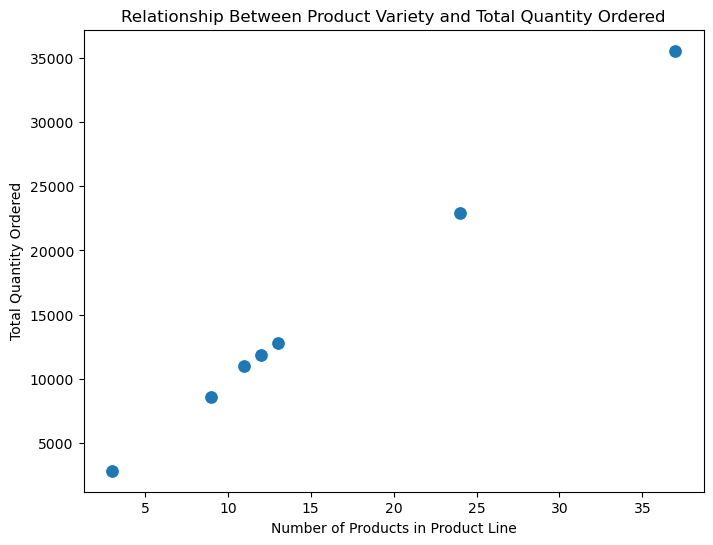

In [11]:
# Replace None with your visual code
# Produce a visual to represent the the relation between number of products and the total amount ordered
plt.figure(figsize=(8,6))
sns.scatterplot(data=product_analysis,
                x='num_products',
                y='total_quantity',
                s=100)

plt.title("Relationship Between Product Variety and Total Quantity Ordered")
plt.xlabel("Number of Products in Product Line")
plt.ylabel("Total Quantity Ordered")
plt.show()

## Reflection Question:

Please explain your choice in the type of visual you used in order to highlight and represent the data from the above query. In a non-technical manner explain why that chart type makes sense for the information being conveyed. What does this visual convey in the context of the question it was asked for?

I chose a scatterplot because it is ideal for showing relationships between two numerical variables. In this case, we are comparing the number of products within each product line with the total quantity ordered. The scatterplot allows us to visually assess whether having more products in a line leads to higher total sales. This helps determine if products variety influences demand. 

### Step 8: Remote Offices
Upper management is considering a shift to hybrid and remote work for certain locations and roles. They have tasked you with providing them data about employees who work in any office that has fewer than 5 total employees so they can better understand how to support those employees remotely when offices are shut down. 

Be sure to include information about the employees job and supervisor so management can adjust everyone to remote work properly.

Hint: Utilize a subquery to find the relevant offices

Execute a SQl query that returns the information required to address this ask.

In [12]:
# Replace None with your code
query8 = """
SELECT e.firstName,
       e.lastName,
       e.jobTitle, 
       e.reportsTo,
       e.officeCode
FROM employees e
WHERE e.officeCode IN (
    SELECT officeCode
    FROM employees
    GROUP BY officeCode
    HAVING COUNT (employeeNumber) < 5
)
"""

remote_employees = pd.read_sql(query8, conn)
remote_employees

,firstName,lastName,jobTitle,reportsTo,officeCode
0,William,Patterson,Sales Manager (APAC),1056,6
1,Julie,Firrelli,Sales Rep,1143,2
2,Steve,Patterson,Sales Rep,1143,2
3,Foon Yue,Tseng,Sales Rep,1143,3
4,George,Vanauf,Sales Rep,1143,3
5,Larry,Bott,Sales Rep,1102,7
6,Barry,Jones,Sales Rep,1102,7
7,Andy,Fixter,Sales Rep,1088,6
8,Peter,Marsh,Sales Rep,1088,6
9,Tom,King,Sales Rep,1088,6


## Reflection Question:

Describe how you decided on the subquery that you used in the query above? This answer can be technically in nature, describing your thought process in how the main query is utilizing the subquery to return the correct data.

I used a subquery to first identify which office codes had fewer than 5 employees by grouping employees by OfficeCode and using a HAVING clause to filter offices with a COUNT less than 5. The main query then selects employee details only for those offices. This ensures the filtering is dynamic and not hard-coded.

### Step 9: Close the Connection

Now that you are finished executing your queries and retrieving the required information you always want to make sure to close the connection to your database.

In [13]:
# Replace None with your code
conn.close()

### End of Guided Section
In this initial portion of the assessment, you produced several data queries and visualizations for a model company, mainly focused around its customer and product data. You wrote and engineered specific SQL queries to address pertinent questions and asks from the company. Along the way, you utilized many of the major concepts and keywords associated with SQL SELECT queries: FROM, WHERE, GROUP BY, HAVING, ORDER BY, JOIN, SUM, COUNT, and AVG.

## Part 2: Exploratory Analysis with SQL
In this open-ended exploratory section, you will analyze real-world data from the movie industry. As a data analyst, you have the freedom to investigate questions and topics that intrigue you within this dataset. The database schema and Entity-Relationship Diagram (ERD) are provided below for your reference. A general overview and instructions are also provided below.

In [25]:
# Run this cell without changes
import zipfile

zip_file_path = 'im.db.zip'
extract_to_path = './'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Connection
conn4 = sqlite3.connect('im.db')

# Schema
schema_df = pd.read_sql("""
SElECT * FROM sqlite_master                        
""", conn4)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## The Data

![movie ERD](images/movie_data_erd.jpeg)
### Database Content:

- Source: IMDB
- Time Range: Movies released between 2010 and 2019
- Note: Exclude any movies with a start_year after 2019 as this data is not current or accurate

Available Data Categories:
- Genre
- Runtime
- Personnel (writers, directors, actors)
- Movie ratings

### Objectives:

Initial Exploration:
- Use SQL in combination with Pandas to explore the database
- Identify interesting trends, patterns, or relationships in the data

Business Question Formulation:
- Develop at least one substantial business question for deeper analysis
- Ensure the question is relevant, specific, and can be addressed with the available data

Data Cleaning Assessment:
- Identify potential data cleaning tasks necessary for your deeper analysis
- Note: You are not required to perform the cleaning, only to recognize and list the necessary tasks

Null Value Handling:
- Be aware that the dataset contains null values in certain fields
- Exclude these null values from your exploration
- Do not attempt to input or fill in missing information

### Deliverables:

You need to produce a short slide presentation (3-5 slides) that highlights the three key deliverables below. Utilize a data visualization to support the second deliverable.

1. A summary of your initial data exploration findings
    - Can be bulleted or sentence form
2. At least one well-formulated business question for further analysis
    - Should stem from a relevant trend or pattern your initial exploration identified
3. A list of potential data cleaning tasks identified during your exploration
    - This can and should include things like data normalization/standardization and null handling

Tips for Success:

Begin with broad exploratory queries to understand the data's scope and content. Then focus on honing in on interesting relationships between different data categories. Consider industry trends, audience preferences, or financial aspects when formulating your business question. Pay attention to data quality issues, inconsistencies, or limitations that might affect your analysis. Remember, the goal is to demonstrate your analytical thinking and ability to derive meaningful insights from complex datasets. Good luck with your exploration!

NOTE: You do not need to explore every aspect of this database. Find something that you think is interesting or relevant about the data and focus your exploration there.

In this analysis, I explore movie industry data (2010-2019) sourced from IMDb. The dataset includes information on:

-Movie release year
-Genre
-Runtime
-Ratings and vote counts
-Directors and other personnel

All movies released after 2019 are excluded, and null values are not included. 

In [26]:
tables = ['movie_basics', 'movie_ratings', 'directors', 'persons']

for t in tables:
    count = pd.read_sql(f"""
        SELECT COUNT(*) AS count
        FROM {t}
    """, conn4)

    print(f"{t}: {count['count'][0]} rows")

movie_basics: 146144 rows
movie_ratings: 73856 rows
directors: 291174 rows
persons: 606648 rows


Initial Data Exploration and Findings

-The dataset contains movies release between 2010 and 2019.
-Ratings data is stored separately and must be joined using 'movie_id'.
-Personnel data (directors, writers, actors) is linked through relational joins. 
-Some fields contain null values and must be excluded in analysis. 

In [27]:
movies_per_year = pd.read_sql("""
SELECT start_year, COUNT(*) AS num_movies
FROM movie_basics
WHERE start_year <= 2019
AND start_year IS NOT NULL
GROUP BY start_year
ORDER BY start_year
""", conn4)

movies_per_year

,start_year,num_movies
0,2010,11849
1,2011,12900
2,2012,13787
3,2013,14709
4,2014,15589
5,2015,16243
6,2016,17272
7,2017,17504
8,2018,16849
9,2019,8379


In [28]:
avg_rating_per_year = pd.read_sql("""
SELECT mb.start_year,
       AVG(mr.averagerating) AS avg_rating, 
       COUNT(mb.movie_id) AS num_movies
FROM movie_basics mb
JOIN movie_ratings mr
        ON mb.movie_id = mr.movie_id
WHERE mb.start_year <= 2019
AND mb.start_year IS NOT NULL
AND mr.averagerating IS NOT NULL
GROUP BY mb.start_year
ORDER BY mb.start_year
""", conn4)

avg_rating_per_year

,start_year,avg_rating,num_movies
0,2010,6.259585,6792
1,2011,6.290134,7389
2,2012,6.297057,7680
3,2013,6.287259,7990
4,2014,6.319806,8371
5,2015,6.265894,8494
6,2016,6.347300,8721
7,2017,6.397624,8713
8,2018,6.415599,7526
9,2019,6.703578,2180


In [29]:
top_genres = pd.read_sql("""
SELECT mb.genres,
       AVG(mr.averagerating) AS avg_rating,
       COUNT(*) AS num_movies
FROM movie_basics mb
JOIN movie_ratings mr
    ON mb.movie_id = mr.movie_id
WHERE mb.start_year <= 2019
AND mb.genres IS NOT NULL
AND mr.averagerating IS NOT NULL
GROUP BY mb.genres
HAVING COUNT(*) >= 50
ORDER BY avg_rating DESC
LIMIT 10 
""", conn4)

top_genres

,genres,avg_rating,num_movies
0,Music,7.615341,176
1,"Adventure,Documentary",7.567692,130
2,"Biography,Documentary,Music",7.566250,240
3,"Documentary,Family,History",7.554902,51
4,"Documentary,History,Music",7.546341,82
5,"Biography,Documentary,Family",7.536364,132
6,"Documentary,History,War",7.532584,89
7,"Documentary,Sport",7.500000,318
8,"Biography,Documentary,Drama",7.498674,377
9,"Adventure,Biography,Documentary",7.492982,114


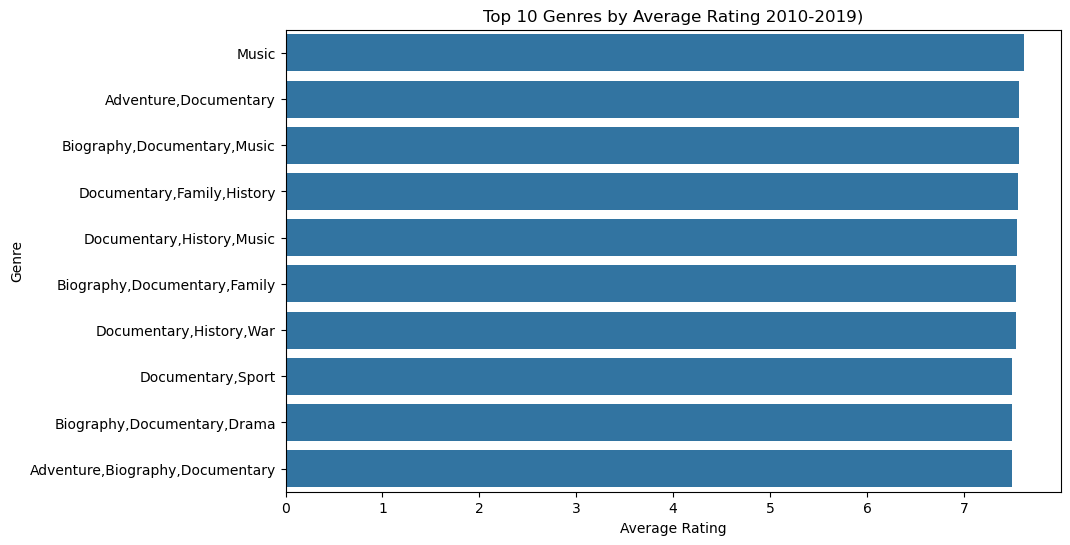

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.barplot(
    data=top_genres,
    x='avg_rating',
    y='genres'
)

plt.title("Top 10 Genres by Average Rating 2010-2019)")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

conn4.close()

## Business Question

Which movie genres consistently receive the highest ratings between 2010 and 2019? 

This question is relevant for 
-Streaming platforms deciding what genres to prioritize
-Production companies allocating budgets
-Investors seeking high performing categories

The analysis above show which genres have the highest average ratings while maintaining a meaningful number of movies (minimum 50).

## Data Cleaning Assessment

During exploration, the following data quality issues were identified: 

1. Null values in: 
-'start-year'
-'genres'
-'averagerating'
-'numvotes'

2. Some genres contain multiple categories in a single field (comma separated), which may require normalization for deeper analysis.

3. Outlier Risk: 
-Movies with very low vote counts may distort average ratings.
-Future analysis should consider filtering by minimum vote threshold. 

4. Personnel tables (directors, writers) may contain individuals linked to very few movies, requiring filtering for meaningful comparison. 

Null values were excluded from this analysis rather than imputed. 

## Final Summary

Key Findings: 
-Movie production trends fluctuate across years.
-Certain genres consistently receive higher ratings.
-Ratings data must be carefully filtered to avoid distortions from low-vote movies.

Business Insight: 
High performing genres (based on ratings and sufficient movie counts) present strategic opportunities for investment and content acquisition. 

Future Work: 
-Normalize genre categories. 
-Filter by vote thresholds.
-Explore director-level performance trends. 